# Data Wrangling WeRateDogs
**By Jalal Tareen**


## Introduction
My goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

The dataset that i will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets.

## Project Details
Tasks in this project are as follows:

* Data wrangling: which consists of: Gathering data, Assessing data and Cleaning data.
* Storing: which consists of analyzing, and visualizing your wrangled data

Reporting on:

1) your data wrangling efforts  
2) your data analyses and visualizations

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import os
import re

## Gathering Data
Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

1) The WeRateDogs Twitter archive.Downloaded this file manually by clicking the following link: [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

2) The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL:    
[Image-Predictions](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

3) Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

**Twitter Archive File**

In [2]:
twitter_archrive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archrive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [3]:
twitter_archrive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
sample_tweet = twitter_archrive.iloc[2]
sample_tweet

tweet_id                                                     891815181378084864
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-31 00:18:03 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Archie. He is a rare Norwegian Pouncin...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/891815181...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

In [5]:
sample_tweet.text

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'

### Image Prediction

In [6]:
# downloading the image-prediction-file using the url from udacity servers.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [7]:
file_images = url.split('/')[-1]

with open(os.path.join('./', file_images),mode='wb') as file:
    file.write(response.content)

In [8]:
prediction_file = pd.read_csv(file_images, sep='\\t',engine='python')
prediction_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
prediction_file.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
prediction_file.iloc[2]

tweet_id                                 666033412701032449
jpg_url     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
img_num                                                   1
p1                                          German_shepherd
p1_conf                                            0.596461
p1_dog                                                 True
p2                                                 malinois
p2_conf                                            0.138584
p2_dog                                                 True
p3                                               bloodhound
p3_conf                                            0.116197
p3_dog                                                 True
Name: 2, dtype: object

**Twitter API from Json**

# Please not I haven't received authoraization from twitter so Udacity mentor provided me tweet_json.txt file.
I have still put code below to show that what would have used
import tweepy from tweepy import OAuthHandler import json from timeit import default_timer as timer

Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
These are hidden to comply with Twitter's API terms and conditions

<code>
    
    consumer_key = 'HIDDEN' 
    consumer_secret = 'HIDDEN' 
    access_token = 'HIDDEN' 
    access_secret = 'HIDDEN'
    auth = OAuthHandler(consumer_key, consumer_secret) auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth, wait_on_rate_limit=True)
    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0 
    fails_dict = {} 
    start = timer()

    #Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        print("Success")
        json.dump(tweet._json, outfile)
        outfile.write('\n')
    except tweepy.TweepError as e:
        print("Fail")
        fails_dict[tweet_id] = e
        pass
    end = timer() print(end - start) print(fails_dict)

    #using with open so it can be close properly when finished using file
    with open('tweet_json.txt', 'w') as outfile:
    json.dump(tweet_data, outfile, sort_keys = True, indent=4 ensure_ascii = False)

In [11]:
# Load data from json_tweet.txt
data = []
with open('tweet_json.txt') as f:
    for line in f:
        data.append(json.loads(line))
        
# Count number of line in this file        
count = len(open('tweet_json.txt').readlines())

# Retrieve the id, favorite_count, and retweet_count and store the data into a new dataframe
df_list = []
print(count)
for index in range(count-1):
    tweet_id = data[index]['id']
    fav_count = data[index]['favorite_count']
    ret_count = data[index]['retweet_count']
    df_list.append({'tweet_id':tweet_id, 
                'favorite_count':fav_count,
                'retweet_count': ret_count})
    df_api_data = pd.DataFrame(df_list,columns = ['tweet_id','favorite_count','retweet_count'])

2354


## Assessing Data

### Project Requirment:

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points below) must be assessed.

Key Points

Key points to keep in mind when data wrangling for this project:

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* Cleaning includes merging individual pieces of data according to the rules of tidy data.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [12]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2353 non-null   int64
 1   favorite_count  2353 non-null   int64
 2   retweet_count   2353 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [13]:
twitter_archrive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
691,787322443945877504,NaN,NaN,2016-10-15 16:01:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lincoln. He forgot to use his blinker ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787322443...,10,10,Lincoln,None,None,None,None
1466,694342028726001664,NaN,NaN,2016-02-02 02:10:14 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",It's okay pup. This happens every time I liste...,NaN,NaN,NaN,https://vine.co/v/iJWKejYdLlh,11,10,None,None,None,None,None
1399,699691744225525762,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,None,None,None,None
711,784517518371221505,NaN,NaN,2016-10-07 22:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He has yet to learn how to co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784517518...,11,10,Frankie,None,None,None,None
1560,688519176466644993,NaN,NaN,2016-01-17 00:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is sprouting a flower out of her h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688519176...,12,10,None,None,None,pupper,None
2080,670823764196741120,NaN,NaN,2015-11-29 04:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He's a man dime. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670823764...,12,10,Remington,None,None,None,None
1444,696713835009417216,NaN,NaN,2016-02-08 15:14:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Trevith. He's a Swiss Mountain Roadwoo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696713835...,9,10,Trevith,None,None,pupper,None
1431,697516214579523584,NaN,NaN,2016-02-10 20:23:19 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to Pherb. He does parkour. 9/10 http...,NaN,NaN,NaN,https://vine.co/v/i1LriMBmX6W,9,10,Pherb,None,None,None,None
1669,682429480204398592,NaN,NaN,2015-12-31 05:14:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know we joke around on here, but this is get...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/682429480...,8,10,None,None,None,None,None
1758,678755239630127104,NaN,NaN,2015-12-21 01:53:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dash. He didn't think the water would ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678755239...,10,10,Dash,None,None,None,None


In [14]:
twitter_archrive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
twitter_archrive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
twitter_archrive.name.isnull().sum()

0

In [17]:
twitter_archrive.loc[np.random.randint(0,twitter_archrive.shape[0],[30]),['text','name']]

,text,name
1859,Meet Reggie. He's going for the world record. ...,Reggie
272,RT @dog_rates: Say hello to Maddie and Gunner....,Maddie
815,RT @katieornah: @dog_rates learning a lot at c...,None
119,"This is Dewey (pronounced ""covfefe""). He's hav...",Dewey
252,This is Brady. He's a recovering alcoholic. De...,Brady
820,Meet Al Cabone. He's a gangsta puppa. Rather h...,Al
124,RT @dog_rates: Say hello to Cooper. His expres...,Cooper
1033,This is Jeffrey. He wasn't prepared to execute...,Jeffrey
77,This is Aja. She was just told she's a good do...,Aja
572,oh h*ck 10/10 https://t.co/bC69RrW559,None


In [18]:
twitter_archrive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
            ... 
Rooney         1
Hector         1
Ferg           1
Kaia           1
Charleson      1
Name: name, Length: 957, dtype: int64

In [19]:
twitter_archrive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
prediction_file.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
prediction_file.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
prediction_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2353 non-null   int64
 1   favorite_count  2353 non-null   int64
 2   retweet_count   2353 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [24]:
df_api_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [25]:
df_api_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.353000e+03,2353.000000,2353.000000
mean,7.427304e+17,8083.325542,3165.916277
std,6.852444e+16,11816.729151,5285.614809
min,6.660293e+17,0.000000,0.000000
25%,6.783997e+17,1415.000000,626.000000
50%,7.195514e+17,3604.000000,1474.000000
75%,7.993088e+17,10132.000000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


## Quality:

* missing and incorrected dog names and the most popular dogname is 'a' which is not a name given by owner.
* Retweeted records removed.
* TimeStamp is in string format.
* Source not extracted from hyper link tag.
* Columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id and retweeted_status_timestamp, have a lot of null values.
* The datatype of the tweet_id - columns is integer and should be str.
* Taking care of incorrect ratings such as numerator less than 10 or denominator not equal to 10.
* Dog breeds start with lower case letters and contains '_'

## Tidiness
* The dog stage columns in twitter_archive can be arranged into a single column.
* The image predictions could be condensed to show just the most confident dog breed prediction.
* All three dataframes can be combined into one single dataframe.

## Clean
Cleaning process consists of three steps: Define, code & Test. First we define how to tackle the issue. Then, we code to resolve the issue and finally we test our code to see if the issues with the data have been resolved. So, in order to clean these 3 dataframes, I carried out the 3 steps for each of the issues and was finally able to achive a clean dataframe.

In [26]:
#Create a copy of all the gathered dataframes
df_twitter_archive_copy = twitter_archrive.copy()
df_img_predictions_copy = prediction_file.copy()
df_tweet_data_copy = df_api_data.copy()

In [27]:
df_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
len(df_twitter_archive_copy.query('retweeted_status_id != "NaN"'))

181

In [29]:
df_twitter_archive_copy = df_twitter_archive_copy.query('retweeted_status_id == "NaN"')

In [30]:
len(df_twitter_archive_copy.query('retweeted_status_id != "NaN"'))

0

In [31]:
df_twitter_archive_copy = df_twitter_archive_copy[(df_twitter_archive_copy.rating_numerator >= 10)
                                                & (df_twitter_archive_copy.rating_denominator == 10)]

In [32]:
(df_twitter_archive_copy.rating_numerator < 10).any()

False

In [33]:
(df_twitter_archive_copy.rating_denominator != 10).any()

False

In [34]:
# Creating two lists: one for the names we can' extract and one for the new names
names_clean = []
missing_names = []

# Creating a lit of the texts
text_list = df_twitter_archive_copy['text'].values.tolist()

# Creating a regex pattern
pattern = re.compile('([A-Z].*)')

# Iterating thourgh the text list and check if the content and pattern correspond to some of the extressions
for text in df_twitter_archive_copy['text']:
    
    if text.__contains__('This is') and pattern.fullmatch(text.split()[text.split().index("is")+1]):
        names_clean.append(text.split(" ")[2].strip('.').strip(','))
    elif text.startswith("Meet") and pattern.fullmatch(text.split(" ")[1]):
        names_clean.append(text.split(" ")[1].strip('.').strip(','))
    elif text.startswith("Here we have") and pattern.fullmatch(text.split(" ", 3)[3]):
        names_clean.append(text.split(" ")[3].strip('.').strip(','))
    elif text.split(" ").__contains__("named") and pattern.fullmatch(text.split()[text.split().index("named")+1]):
        names_clean.append(text.split()[text.split().index("named")+1].strip('.').strip(','))
    elif text.__contains__("name is") and pattern.fullmatch(text.split()[text.split().index("is")+1]):
        names_clean.append(text.split()[text.split().index("is")+1].strip('.').strip(','))
    elif text.__contains__("Say hello to") and pattern.fullmatch(text.split()[text.split().index("to")+1]):
        names_clean.append(text.split(" ")[3].strip('.').strip(','))
    else:
        names_clean.append("NaN")
        missing_names.append(text)

In [35]:
len(names_clean)

1727

In [36]:
len(missing_names)

572

In [37]:
df_twitter_archive_copy['name'] = names_clean

In [38]:
df_twitter_archive_copy['name'] = df_twitter_archive_copy['name'].replace(to_replace = r'^([a-z])',
                                                                          value = np.nan, regex = True)

In [39]:
df_twitter_archive_copy.name.value_counts()

NaN         572
Charlie      11
Lucy         10
Oliver        9
Cooper        9
           ... 
Flurpson      1
Edd           1
Harvey        1
Rubio         1
Cannon        1
Name: name, Length: 811, dtype: int64

In [40]:
def extract_source(row):
    try:
        source = re.search('>(.+)</a>', row['source']).group(1)
    except AttributeError:
        source = ''
    return source

In [41]:
df_twitter_archive_copy['source'] = df_twitter_archive_copy.apply(extract_source, axis=1)
df_twitter_archive_copy['source'] = df_twitter_archive_copy.source.astype('category')

In [42]:
df_twitter_archive_copy.source.value_counts()

Twitter for iPhone     1613
Vine - Make a Scene      84
Twitter Web Client       20
TweetDeck                10
Name: source, dtype: int64

In [43]:
def extract_gender(row):
    if 'He' in row['text']:
        gender = 'M'
    elif 'She' in row['text']:
        gender = 'F'
    else:
        gender = ''
    return gender

In [44]:
df_twitter_archive_copy['gender'] = df_twitter_archive_copy.apply(extract_gender, axis=1)
df_twitter_archive_copy['gender'] = df_twitter_archive_copy.gender.astype('category')

In [45]:
df_twitter_archive_copy.gender.value_counts()

M    839
     634
F    254
Name: gender, dtype: int64

In [46]:
df_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 0 to 2350
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    1727 non-null   int64   
 1   in_reply_to_status_id       62 non-null     float64 
 2   in_reply_to_user_id         62 non-null     float64 
 3   timestamp                   1727 non-null   object  
 4   source                      1727 non-null   category
 5   text                        1727 non-null   object  
 6   retweeted_status_id         0 non-null      float64 
 7   retweeted_status_user_id    0 non-null      float64 
 8   retweeted_status_timestamp  0 non-null      object  
 9   expanded_urls               1682 non-null   object  
 10  rating_numerator            1727 non-null   int64   
 11  rating_denominator          1727 non-null   int64   
 12  name                        1724 non-null   object  
 13  doggo             

## Tidiness

In [47]:
df_twitter_archive_copy.loc[(df_twitter_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,gender
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,None,None,puppo,M
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,floofer,None,None,
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None,F
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,Burke,doggo,None,pupper,None,M
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,Twitter for iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo,None,pupper,None,
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,Twitter for iPhone,This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None,M
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None,M
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,Vine - Make a Scene,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggo,None,pupper,None,
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None,
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,Twitter for iPhone,This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,NaN,doggo,None,pupper,None,


In [48]:
# Replace empty None with a blank
df_twitter_archive_copy.doggo.replace('None', '', inplace=True)
df_twitter_archive_copy.floofer.replace('None', '', inplace=True)
df_twitter_archive_copy.pupper.replace('None', '', inplace=True)
df_twitter_archive_copy.puppo.replace('None', '', inplace=True)

In [49]:
# Create a new column for dog_stage
df_twitter_archive_copy['dog_stage'] =df_twitter_archive_copy.doggo + df_twitter_archive_copy.floofer+ df_twitter_archive_copy.pupper + df_twitter_archive_copy.puppo
df_twitter_archive_copy.dog_stage.value_counts()

                1427
pupper           185
doggo             72
puppo             23
floofer            9
doggopupper        9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [50]:
df_twitter_archive_copy[['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']].sample(10)

,doggo,floofer,pupper,puppo,dog_stage
1148,,,,,
28,,,,,
508,,,,,
149,,,,,
2007,,,,,
398,,,,puppo,puppo
1368,,,,,
312,,,,,
1574,,,,,
1139,,,pupper,,pupper


In [51]:
# Rename values in dog_stage column
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == 'pupper', 'dog_stage'] = 'Pupper'
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == 'doggo', 'dog_stage'] = 'Doggo'
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == 'puppo', 'dog_stage'] = 'Puppo'
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == 'doggopupper', 'dog_stage']= 'Doggo, Pupper'
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == 'floofer', 'dog_stage'] ='Floofer'
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == 'doggopuppo', 'dog_stage']= 'Doggo, Puppo'
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'Doggo, Floofer'
# Replace blank cells with NaNs
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == '', 'dog_stage'] = np.nan
# Replace NaNs with text so we have non-null values
df_twitter_archive_copy.dog_stage = df_twitter_archive_copy.dog_stage.fillna('Unknown')
df_twitter_archive_copy.dog_stage.value_counts()

Unknown           1427
Pupper             185
Doggo               72
Puppo               23
Doggo, Pupper        9
Floofer              9
Doggo, Floofer       1
Doggo, Puppo         1
Name: dog_stage, dtype: int64

In [52]:
# Drop unnecessary columns
df_twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [53]:
list(df_twitter_archive_copy)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'gender',
 'dog_stage']

In [54]:
breed = []
confidence = []

def get_breed_and_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Not identified')
        confidence.append(np.nan)

In [55]:
df_img_predictions_copy.apply(get_breed_and_confidence, axis=1)
df_img_predictions_copy['breed'] = pd.Series(breed)
df_img_predictions_copy['confidence'] = pd.Series(confidence)
df_img_predictions_copy.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [56]:
df_img_predictions_copy.head()

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [57]:
df_img_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   breed       2075 non-null   object 
 4   confidence  1751 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


In [58]:
df = pd.merge(df_twitter_archive_copy, df_img_predictions_copy, on='tweet_id')
df = df.merge(df_tweet_data_copy, on='tweet_id')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1566 entries, 0 to 1565
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    1566 non-null   int64   
 1   in_reply_to_status_id       20 non-null     float64 
 2   in_reply_to_user_id         20 non-null     float64 
 3   timestamp                   1566 non-null   object  
 4   source                      1566 non-null   category
 5   text                        1566 non-null   object  
 6   retweeted_status_id         0 non-null      float64 
 7   retweeted_status_user_id    0 non-null      float64 
 8   retweeted_status_timestamp  0 non-null      object  
 9   expanded_urls               1566 non-null   object  
 10  rating_numerator            1566 non-null   int64   
 11  rating_denominator          1566 non-null   int64   
 12  name                        1563 non-null   object  
 13  gender            

In [60]:
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id',
         'retweeted_status_id', 'retweeted_status_timestamp'], axis=1, inplace=True)
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,gender,dog_stage,jpg_url,img_num,breed,confidence,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,M,Unknown,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not identified,NaN,39467,8853
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,F,Unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,33819,6514
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,M,Unknown,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,25461,4328
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,F,Unknown,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,42908,8964
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,M,Unknown,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,41048,9774


In [61]:
df.tweet_id = df.tweet_id.to_string()
df.timestamp = pd.to_datetime(df.timestamp, yearfirst=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1566 entries, 0 to 1565
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1566 non-null   object             
 1   timestamp           1566 non-null   datetime64[ns, UTC]
 2   source              1566 non-null   category           
 3   text                1566 non-null   object             
 4   expanded_urls       1566 non-null   object             
 5   rating_numerator    1566 non-null   int64              
 6   rating_denominator  1566 non-null   int64              
 7   name                1563 non-null   object             
 8   gender              1566 non-null   category           
 9   dog_stage           1566 non-null   object             
 10  jpg_url             1566 non-null   object             
 11  img_num             1566 non-null   int64              
 12  breed               1566 non-null 

In [63]:
df['breed'] = df.breed.str.capitalize()
df['breed'].replace(regex=True,inplace=True,to_replace="_",value=r' ')

In [64]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,gender,dog_stage,jpg_url,img_num,breed,confidence,favorite_count,retweet_count
0,0 892420643555336193\n1 8921774213...,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,M,Unknown,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not identified,NaN,39467,8853
1,0 892420643555336193\n1 8921774213...,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,F,Unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,33819,6514
2,0 892420643555336193\n1 8921774213...,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,M,Unknown,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,25461,4328
3,0 892420643555336193\n1 8921774213...,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,F,Unknown,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador retriever,0.168086,42908,8964
4,0 892420643555336193\n1 8921774213...,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,M,Unknown,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,41048,9774


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1566 entries, 0 to 1565
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1566 non-null   object             
 1   timestamp           1566 non-null   datetime64[ns, UTC]
 2   source              1566 non-null   category           
 3   text                1566 non-null   object             
 4   expanded_urls       1566 non-null   object             
 5   rating_numerator    1566 non-null   int64              
 6   rating_denominator  1566 non-null   int64              
 7   name                1563 non-null   object             
 8   gender              1566 non-null   category           
 9   dog_stage           1566 non-null   object             
 10  jpg_url             1566 non-null   object             
 11  img_num             1566 non-null   int64              
 12  breed               1566 non-null 

## Visualization
### Top sources
The graph below shows the top sources of the tweets. Most users tweeted using Twitter on iPhone.

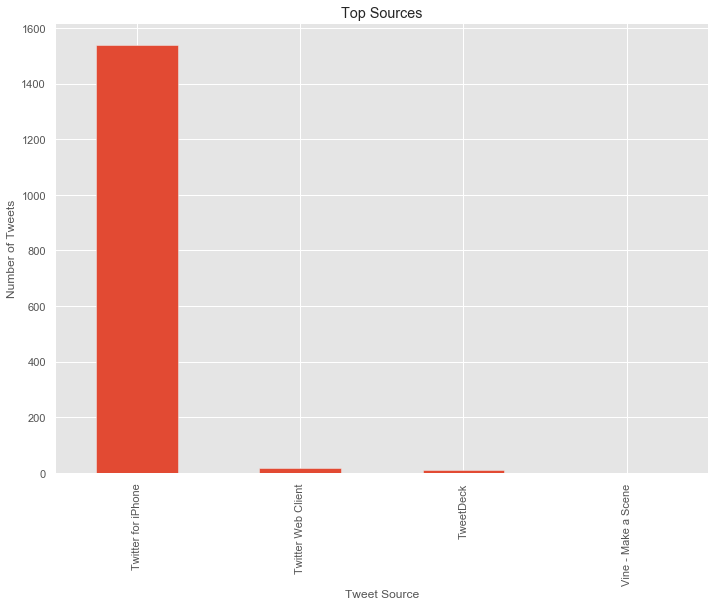

In [107]:
plot1 = df.source.value_counts().plot(kind='bar', title='Top Sources')
plot1.set_xlabel("Tweet Source")
plot1.set_ylabel("Number of Tweets");

## Most Popular names

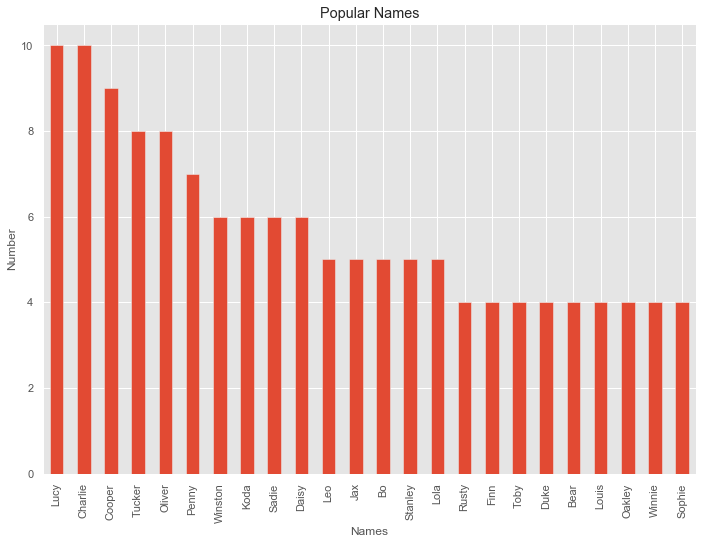

In [111]:
plot2 = df_na.name.value_counts()[1:25].plot(kind='bar', title = 'Popular Names')
plot2.set_xlabel("Names")
plot2.set_ylabel("Number");

## Ratings:

This shows how dogs are rated and How many are below average or above average.

In [68]:
df['rating'] = df.rating_numerator/df.rating_denominator

#Use ratings to divide into categories
df['rating_category'] = pd.cut(df.rating, bins = [0.0, np.percentile(df.rating,25), np.percentile(df.rating,50), np.percentile(df.rating,75), np.max(df.rating)],labels=['Low','Below_average','Above_average','High'])

#Drop the unwanted columns
df.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

In [69]:
df.rating_category.value_counts()

Above_average    450
Low              419
Below_average    396
High             301
Name: rating_category, dtype: int64

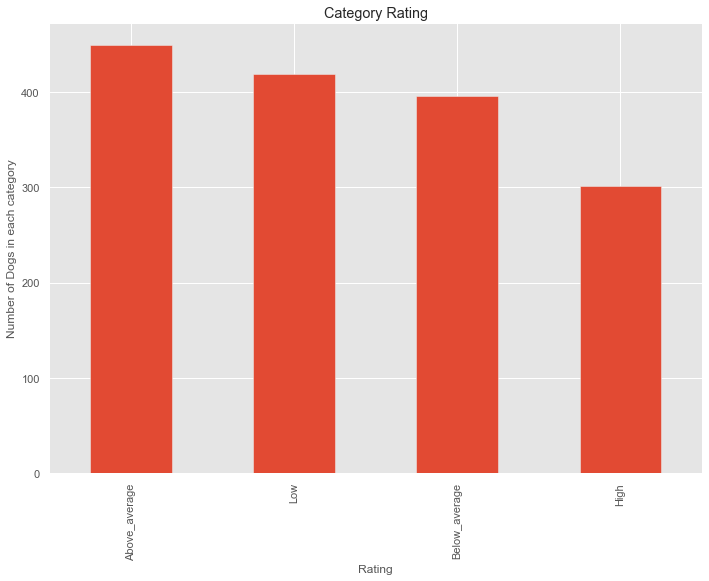

In [112]:
plot3 = df.rating_category.value_counts().plot(kind='bar', title='Category Rating');
plot3.set_xlabel("Rating")
plot3.set_ylabel("Number of Dogs in each category");

## Popular Breed:

In [87]:
import seaborn as sns
# Setup function needed
def set_label(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

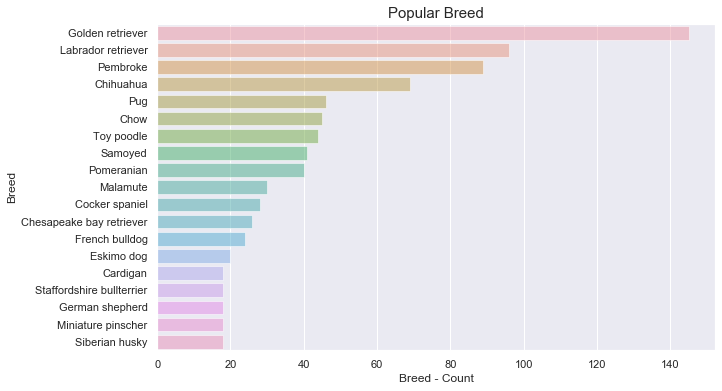

In [93]:
# Top Dog_stage values based on the count
cnt_srs = df['breed'].value_counts()[1:20]
plt.figure(figsize=(10,6))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.5)
plt.xlabel('Breed - Count', fontsize=12)
plt.ylabel('Breed', fontsize=12)
plt.title("Popular Breed", fontsize=15)
plt.show()

**Their are many entries which are not identified breeds as we ignore it for analysis the most popular breed is golden retriver followed by labrador.**